1.
Standard Deviation(SD) describes the spread of individual data points in the dataset, and Standard Error of the Mean(SEM) describes how procisely the sample mean estimates the population mean.
Standard Deviation stays the same regardless of the sample size but the Standard Error of the Mean decreases when the sample size increases.

2.
The formula of confidence interval: CI= average of x±(1.96×SEM)
1.96 is the z-score
confidence interval to z-score
90% -> 1.635
95% -> 1.96
99% -> 2.575
99.5% -> 2.81
99.9 -> 3.29

3.
To create a 95% bootstrapped confidence interval, we can use the distribution of bootstrapped means and find the 2.5th and 97.5th percentiles of this distribution. this method can be used to create 95% bootstrapped confidence interval without using Standard Error of the Mean.

4.

In [1]:
import numpy as np
import pandas as pd


np.random.seed(0)#to get the most random numbers for each run
data = np.random.randn(100) #generates 100 data points from a standard normal distribution
mean = 0, standard deviation = 1


n_bootstrap = 10000#the number of bootstrap samples to generate


bootstrap_means = np.array([np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)])
#np.random.choice(data, size=len(data), replace=True will create a random sample with
#replacement means that the same datapoint can be chosen more than one time from the
#original 'data' of the same size as the dataset which is 100
#'np.mean(..)' will computes the mean of the random sample
#'for _ in range(n_bootstrap)])'this code will let this process 10000 times.

bootstrap_means_sorted = np.sort(bootstrap_means)
#sort the bootstrap means in ascending order, which can make it easier to 
#extract percentiles for the confidence interval.


lower_bound = np.percentile(bootstrap_means_sorted, 2.5)
upper_bound = np.percentile(bootstrap_means_sorted, 97.5)
#'np.percentile(..., 2.5)' Finds the value below which 2.5% of the sorted bootstrapped means fall. This is the lower bound of the 95% confidence interval.
#'np.percentile(..., 97.5)'Finds the value below which 97.5% of the sorted bootstrapped means fall. This is the upper bound.

print(f"95% Bootstrapped Confidence Interval for the Mean: [{lower_bound}, {upper_bound}]")
# prints the 95% confidence interval for the bootstrapped means

95% Bootstrapped Confidence Interval for the Mean: [-0.13606981761800294, 0.25965339116841113]


In [2]:

bootstrap_medians = np.array([np.median(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)])
#mp.median computes the meadian for each bootstrapped sample

bootstrap_medians_sorted = np.sort(bootstrap_medians)
#sort the meadians in acsending order

lower_bound = np.percentile(bootstrap_medians_sorted, 2.5)
upper_bound = np.percentile(bootstrap_medians_sorted, 97.5)

print(f"95% Bootstrapped Confidence Interval for the Median: [{lower_bound}, {upper_bound}]")


95% Bootstrapped Confidence Interval for the Median: [-0.1925415497890759, 0.31306770165090136]


chatlog link for question 1-4:https://chatgpt.com/share/66fad59e-6b50-8003-b08f-5c8593ab817f
summary:
Difference between Standard Error of the Mean (SEM) and Standard Deviation (SD):

You asked about the difference between the standard error of the mean and the standard deviation of the original data.
I explained that the SD measures the spread of individual data points around the mean, while the SEM reflects how precisely the sample mean estimates the population mean. The SEM decreases as the sample size increases and is calculated by dividing the SD by the square root of the sample size.
Creating a 95% Confidence Interval Using SEM:

You then asked how to create a 95% confidence interval using the SEM.
I provided a step-by-step explanation:
Calculate the sample mean and SEM.
Use the z-score for 95% confidence (1.96).
Multiply the SEM by 1.96 and add/subtract this value from the sample mean to get the confidence interval bounds.
I also provided an example to show how the calculation works.
Bootstrapped Confidence Interval for the Population Mean:

You asked how to create a 95% bootstrapped confidence interval for the population mean without using standard deviation.
I explained the process of bootstrapping, which involves:
Generating many resamples of the original data with replacement.
Calculating the mean for each resample.
Sorting the resampled means and finding the 2.5th and 97.5th percentiles to form the confidence interval bounds.
Code for Bootstrapped Confidence Interval:

You requested code to compute a 95% bootstrapped confidence interval for the population mean and an explanation for how it works.
I provided Python code that generates 10,000 bootstrap samples, calculates their means, sorts them, and uses percentiles to compute the confidence interval.
I explained every line of the code, including how bootstrap resampling works, how to compute means for each sample, and how to extract the confidence interval from the sorted means.
Adapting the Code for the Median:

You then asked how to adapt the code for calculating the confidence interval for the median.
I explained that the only change required is replacing np.mean with np.median, and the rest of the process (resampling, sorting, and percentile calculation) remains the same.

5.
We need to distinguish between the role of the popualation parameter and the sample sample statistic because a parameter is a measure that describes the whole population, and a statistic is a measure that describe the chosen sample in population. For example parameter is a true median or mean of a population, and statistic is mean or median of a sample which is used to predict parameter.

6.
1)Bootstrapping is a method that take random samples from a population, and calculate the statistic and then create a distribution to predict the parameter.
2)The main purposes of Bootstrapping is to understand the ditribution of the statistic, like mean and median in a dataset, we can do this without knowing the exact distribution of the population, and it can allow us to create a confidnece interval around the samples.
3)We can use bootstrapping to create new samples from data and calculate the average of each one. From these averages, we can set a confidence interval. If the confidence interval includes the guessed average, it means that the guess is plausible.

7.
1)when a confidence interval overlaps zero, this means that there is a possible that the drug has not effect, this means that we don't have enough evidence to prove the drug have effect, so  "fail to reject the null hypothesis" .
2)If we want to reject the null hypothesis, we need to make confidence interval to exclude zero, this will allow us have enough evidence to show that the drug have a effect, and allow us "to reject the null hypothesis".

8.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data (you can also read this from a CSV file)
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the difference between Final and Initial Health Scores
df['HealthChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Print out the DataFrame
print(df)


   PatientID  Age Gender  InitialHealthScore  FinalHealthScore  HealthChange
0          1   45      M                  84                86             2
1          2   34      F                  78                86             8
2          3   29      M                  83                80            -3
3          4   52      F                  81                86             5
4          5   37      M                  81                84             3
5          6   41      F                  80                86             6
6          7   33      M                  79                86             7
7          8   48      F                  85                82            -3
8          9   26      M                  76                83             7
9         10   39      F                  83                84             1


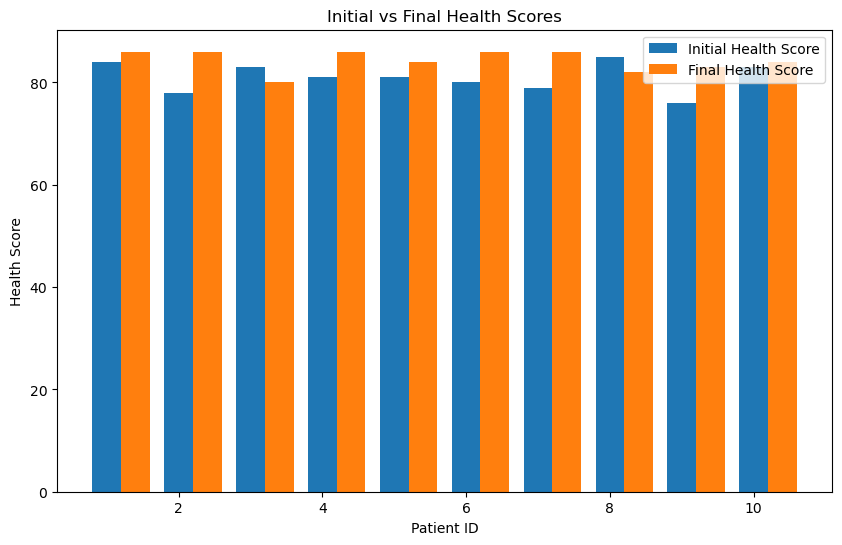

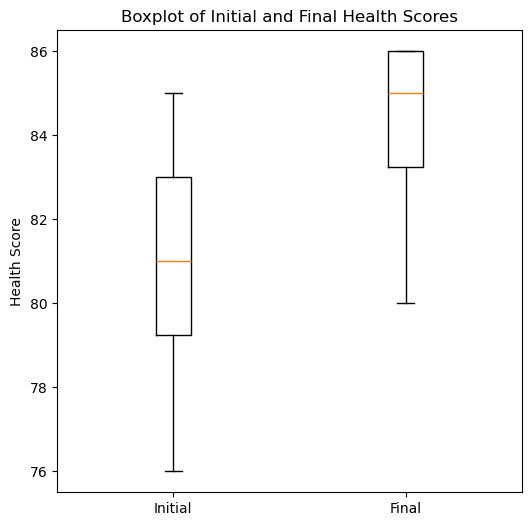

In [2]:
# Bar plot for initial and final health scores
plt.figure(figsize=(10,6))
plt.bar(df['PatientID'], df['InitialHealthScore'], width=0.4, label='Initial Health Score', align='center')
plt.bar(df['PatientID'] + 0.4, df['FinalHealthScore'], width=0.4, label='Final Health Score', align='center')

plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs Final Health Scores')
plt.legend()
plt.show()

# Boxplot to show distribution of health scores
plt.figure(figsize=(6,6))
plt.boxplot([df['InitialHealthScore'], df['FinalHealthScore']], labels=['Initial', 'Final'])
plt.ylabel('Health Score')
plt.title('Boxplot of Initial and Final Health Scores')
plt.show()


In [3]:
# Number of bootstrap samples
n_bootstrap = 10000

# Bootstrapping to calculate the mean of the health score differences
health_changes = df['HealthChange'].values

# Generate bootstrap samples and compute the mean difference for each sample
bootstrap_means = np.array([np.mean(np.random.choice(health_changes, size=len(health_changes), replace=True)) for _ in range(n_bootstrap)])

# Calculate the 95% confidence interval for the mean health score difference
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Bootstrapped Confidence Interval for the Mean Health Change: [{lower_bound}, {upper_bound}]")

# Calculate the observed mean health change
observed_mean_change = np.mean(health_changes)
print(f"Observed Mean Health Change: {observed_mean_change}")


95% Bootstrapped Confidence Interval for the Mean Health Change: [0.9, 5.5]
Observed Mean Health Change: 3.3


In [4]:
# Check if the confidence interval includes 0
if lower_bound <= 0 <= upper_bound:
    print("Fail to reject the null hypothesis: The vaccine may not have a significant effect.")
else:
    print("Reject the null hypothesis: The vaccine has a statistically significant effect.")


Reject the null hypothesis: The vaccine has a statistically significant effect.


I first aksed chatgpt to create a visualizetion of the contrast of health score for each patient before and after the vaccine. Then I asked chatgpt to bootstrapping to run the simulation 10000 times to create mean of the difference between before vacination and fater vaccination. This give a statistic to analyze uncertain of the effect, then I asked chatgpt to write the 95% confidence interval for the mean difference of the health score, if the interval doesn't include 0, then we can say it has effect.
After I ran the code, it shows that the confidence interval for the mean health change doesn't include zero so we can reject the null hypothesis. means there is effect of the vaccine.

chatlog link for question 8:https://chatgpt.com/share/66fc2ba6-7704-8001-b326-676e1abd0edb
summary for 5-8: Hypothesis Testing and Null Hypothesis:

Understand the null hypothesis (H₀), which typically states that there is no effect or difference (e.g., the vaccine has no effect).
Learn how to fail to reject the null hypothesis when the confidence interval includes zero, meaning there's insufficient evidence to suggest a significant effect.
Confidence Intervals:

A confidence interval provides a range of values around the sample estimate (like the mean) that likely contains the true population parameter.
Recognizing how the width of the confidence interval relates to sample size and variability helps interpret results.
Bootstrapping:

Bootstrapping is a resampling technique used to estimate the distribution of a statistic (like the mean or median) by repeatedly sampling from the data.
It helps in assessing the variability and constructing confidence intervals without making strong assumptions about the population distribution.
Statistical Significance:

Learn how to interpret statistical significance in the context of hypothesis testing, including how sample means and confidence intervals inform decisions about rejecting or failing to reject the null hypothesis.
Data Visualization:

Visualization methods (like histograms or box plots) help in understanding the distribution of data and comparing groups (e.g., pre- and post-vaccine scores).
Effective visualizations can provide insights into patterns and variations within the data, supporting quantitative findings.
Quantitative Analysis:

The analysis involves calculating summary statistics (mean, median, standard deviation) and performing bootstrapping to derive confidence intervals for the mean or median health scores.
Be prepared to explain the methodology clearly, emphasizing why you chose certain statistical techniques and what they reveal about the data.

9.